In [1]:
import pandas as pd
import os
import cv2
import numpy as np
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
import numpy as np
from sklearn.metrics import confusion_matrix
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator
from keras import applications

In [2]:
print(os.listdir("../satria data"))

['.ipynb_checkpoints', 'cnn.ipynb', 'cnn2.ipynb', 'convert_data.ipynb', 'Data Latih BDC.xlsx', 'Data Uji BDC.xlsx', 'export.xlsx', 'File Gambar Data Latih', 'File Gambar Data Uji', 'filenya.zip', 'hasil_nlp.csv', 'hasil_nlp.xlsx', 'image_test', 'image_train', 'jst', 'nlp.ipynb']


In [3]:
train_dir="../satria data/image_train"
test_dir="../satria data/image_test"
train=pd.read_excel('../satria data/Data Latih BDC.xlsx')
train = train[['nama file gambar', 'label']]
train['label']=train['label'].astype(str)
test=pd.read_excel('../satria data/Data Uji BDC.xlsx')
test = test['nama file gambar']

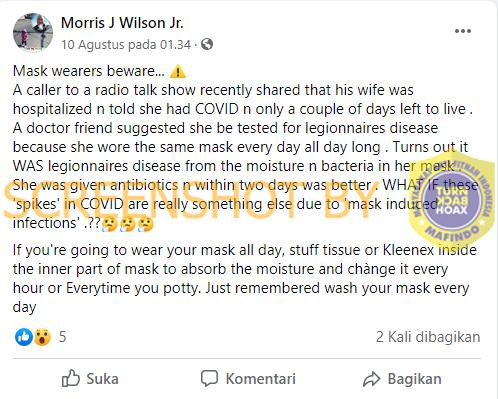

In [4]:
Image(os.path.join("../satria data/image_train",train.iloc[0,0]),width=250,height=250)

In [5]:
train.shape

(4229, 2)

In [6]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=15

In [7]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:4000],directory=train_dir,x_col='nama file gambar',
                                            y_col='label',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[4000:],directory=train_dir,x_col='nama file gambar',
                                                y_col='label',class_mode='binary',batch_size=50,
                                                target_size=(150,150))

Found 4000 validated image filenames belonging to 2 classes.
Found 229 validated image filenames belonging to 2 classes.


In [8]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
epochs=20
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 117s 1s/step - loss: 0.4893 - accuracy: 0.8221 - val_loss: 0.4765 - val_accuracy: 0.8253
Epoch 2/20
100/100 [==============================] - 130s 1s/step - loss: 0.5007 - accuracy: 0.8107 - val_loss: 0.4523 - val_accuracy: 0.8253
Epoch 3/20
100/100 [==============================] - 120s 1s/step - loss: 0.4806 - accuracy: 0.8167 - val_loss: 0.4576 - val_accuracy: 0.8253
Epoch 4/20
100/100 [==============================] - 111s 1s/step - loss: 0.4785 - accuracy: 0.8134 - val_loss: 0.4569 - val_accuracy: 0.8253
Epoch 5/20
100/100 [==============================] - 94s 944ms/step - loss: 0.4550 - accuracy: 0.8240 - val_loss: 0.4662 - val_accuracy: 0.8253
Epoch 6/20
100/100 [==============================] - 99s 989ms/step - loss: 0.4863 - accuracy: 0.8047 - val_loss: 0.4592 - val_accuracy: 0.8253
Epoch 7/20
100/100 [==============================] - 99s 994m